In [27]:
import pandas as pd
import numpy as np
from docx import Document

data = pd.read_csv("current_nba_players.csv")

In [5]:
# Check for missing values
print(data.isnull().sum())

# Drop unnecessary columns (if any)
data_cleaned = data.drop(columns=['Unnamed: 0', 'name', 'nationality_1', 'nationality_2', 'jersey', 'position_2',
                                  'height_feet', 'weight_lbs', 'wingspan_feet', 'birthdate', 'hometown', 'prior_to_nba'], errors='ignore')


Unnamed: 0                   0
name                         0
nationality_1                0
nationality_2              495
team                         1
                          ... 
badge_boxout_beast         450
badge_rebound_chaser       438
badge_brick_wall           451
badge_slippery_off_ball    409
badge_pogo_stick           358
Length: 105, dtype: int64


In [ ]:
# Summary statistics for numeric columns
#numeric_summary = data_cleaned.describe()
#print(numeric_summary)

# Frequency distribution for categorical variables
#print(data['archetype'].value_counts())
#print(data['position_1'].value_counts())
#print(data['badge_deadeye'].value_counts())
print(data['overall_durability'].describe())


count    526.000000
mean      81.026616
std        3.262960
min       60.000000
25%       80.000000
50%       80.000000
75%       82.000000
max       98.000000
Name: overall_durability, dtype: float64


In [41]:
numeric = data_cleaned.select_dtypes(include=[np.number])
categorical = data_cleaned.select_dtypes(include=[object])
#description = numeric.describe()
print(data_cleaned['position_1'].value_counts())

position_1
PF    107
SG    106
PG    105
SF    104
C     104
Name: count, dtype: int64


In [32]:
import pandas as pd
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml.ns import qn
from docx.oxml import OxmlElement

# Run describe() for the DataFrame
description = numeric.describe()

# Create a new Word document
doc = Document()

# Add a title for the document
title = doc.add_heading('Descriptive Statistics', level=1)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER
title.bold = True

# Convert the description DataFrame to a string for plain text output
description_str = description.to_string()

# Add the descriptive statistics as plain text
para = doc.add_paragraph(description_str)
para.alignment = WD_ALIGN_PARAGRAPH.LEFT

# Change the font size to make it more readable
for run in para.runs:
    run.font.size = Pt(10)

# Add a new heading for the table
doc.add_heading('Descriptive Statistics Table', level=1)

# Add the table to the document
table = doc.add_table(rows=1, cols=len(description.columns))

# Style the table header (bold and centered text)
hdr_cells = table.rows[0].cells
for i, column in enumerate(description.columns):
    hdr_cells[i].text = column
    hdr_cells[i].paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER
    for run in hdr_cells[i].paragraphs[0].runs:
        run.font.bold = True

# Add rows to the table
for row in description.iterrows():
    row_cells = table.add_row().cells
    for i, val in enumerate(row[1]):
        row_cells[i].text = str(val)
        row_cells[i].paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER

# Apply font size to the entire table
for row in table.rows:
    for cell in row.cells:
        for paragraph in cell.paragraphs:
            for run in paragraph.runs:
                run.font.size = Pt(10)

# Save the document
doc.save('descriptive_statistics_formatted.docx')

print("Document saved as 'descriptive_statistics_formatted.docx'")


Document saved as 'descriptive_statistics_formatted.docx'


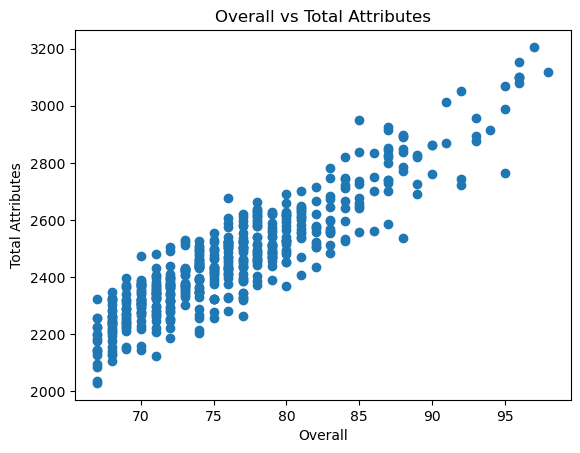

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(data_cleaned['overall'], data_cleaned['total_attributes'])
plt.xlabel('Overall')
plt.ylabel('Total Attributes')
plt.title('Overall vs Total Attributes')
plt.show()

C:\Users\caleb\AppData\Local\Temp\ipykernel_29644\1274983295.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_cleaned['overall'], shade=True)


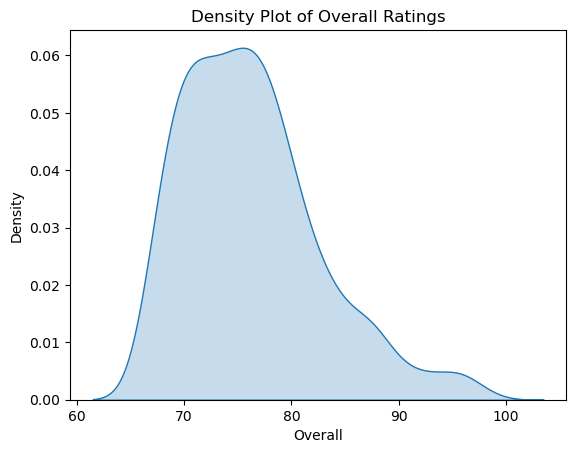

In [40]:
sns.kdeplot(data_cleaned['overall'], shade=True)
plt.xlabel('Overall')
plt.ylabel('Density')
plt.title('Density Plot of Overall Ratings')
plt.show()

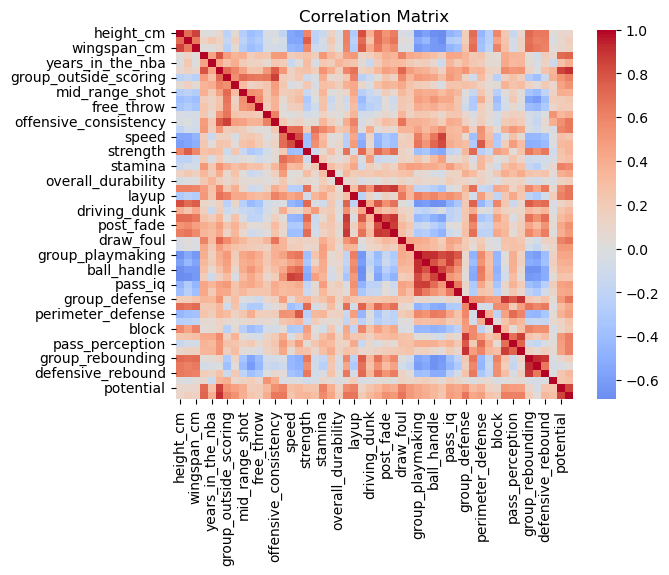

In [44]:
# Create a correlation matrix and plot and remove variable labels

correlation_matrix = numeric.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
